# actMath_11
- District: 45
- Year (Features): 2017
- Grades: 11
- Values / dataSource: actMath
- Features: \['school_High School A', 'school_High School B', 'school_High School C', 'school_High School D', 'category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE', 'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE', 'category_PERFORMING_ARTS', 'category_VISUAL_ARTS', 'category_TECHNOLOGY',
 'category_BUSINESS',
 'category_TRADES',
 'category_AGRICULTURE',
 'category_PHYSICAL_EDUCATION',
 'category_HEALTH',
 'category_CAREER_PREP',
 'category_MILITARY_SCIENCE']
- Num features: 19
- Label: `proficient_score`
- Accuracy: 0.72
- F1: 0.67
- Other metrics: RMSE 0.22; R^2 0.20
- Notes: Dropping vendors from features caused no difference

In [63]:
#Import Python Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
pd.options.display.float_format = '{:.2f}'.format
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
#Loading the dataframe
filename = os.path.join(os.getcwd(), "..", "dataframes", "actMath_11_encoded_df.csv")
actMath11_df = pd.read_csv(filename, header = 0)

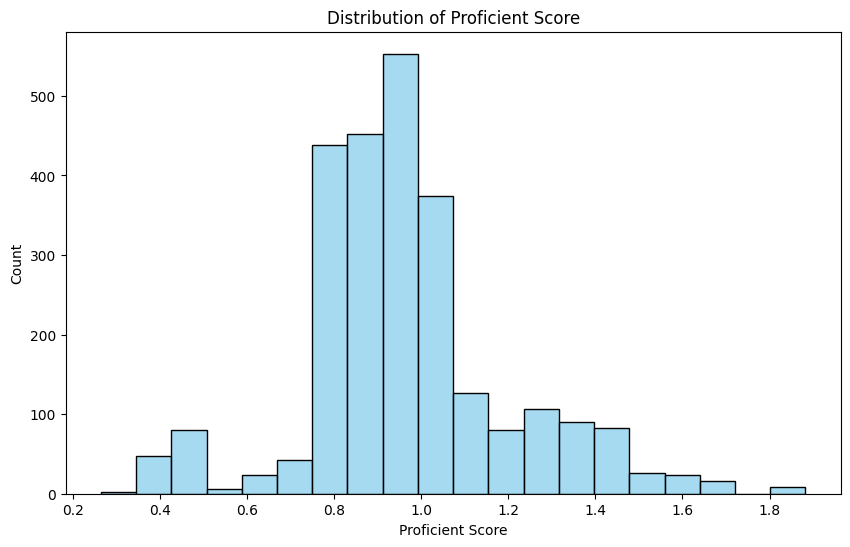

In [65]:
plt.figure(figsize=(10, 6))
sns.histplot(actMath11_df['proficient_score'], bins=20, kde=False, color='skyblue')  # You can adjust bins as necessary
plt.title('Distribution of Proficient Score')
plt.xlabel('Proficient Score')
plt.ylabel('Count')
plt.show()

In [66]:
actMath11_df[actMath11_df.select_dtypes(include='bool').columns] = actMath11_df.select_dtypes(include='bool').astype(int)

actMath11_df.head()

,studentId,is_proficient,proficient_score,school_High School A,school_High School B,school_High School C,school_High School D,iready_math,iready_reading,bbb_literacy,...,category_PERFORMING_ARTS,category_VISUAL_ARTS,category_TECHNOLOGY,category_BUSINESS,category_TRADES,category_AGRICULTURE,category_PHYSICAL_EDUCATION,category_HEALTH,category_CAREER_PREP,category_MILITARY_SCIENCE
0,45054,0,0.26,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,45054,0,0.26,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,45440,0,0.94,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45440,0,0.94,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,45440,0,0.94,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
#apply log function to make the data more "evenly distributed
#actMath11_df['proficient_score'] = np.log1p(actMath11_df['proficient_score'])

In [68]:
# Calculate the correlation matrix for the entire DataFrame
correlation_matrix = actMath11_df.corr()

# Extract the correlation values for 'proficient_score' and sort them in descending order
correlation_with_target = correlation_matrix['proficient_score'].sort_values(ascending=False)

# Display the correlations with proficient_score, excluding proficient_score itself
print(correlation_with_target.drop('proficient_score'))

is_proficient                  0.73
category_SOCIAL_STUDIES        0.36
category_ENGLISH               0.26
category_SCIENCE               0.23
category_FOREIGN_LANGUAGE      0.21
category_MATHEMATICS           0.16
category_PERFORMING_ARTS       0.11
school_High School D           0.09
school_High School B           0.05
category_CAREER_PREP           0.05
category_TECHNOLOGY            0.05
category_HEALTH                0.04
category_MILITARY_SCIENCE      0.03
category_PHYSICAL_EDUCATION   -0.01
iready_reading                -0.03
school_High School A          -0.03
category_VISUAL_ARTS          -0.03
iready_math                   -0.04
school_High School C          -0.04
studentId                     -0.04
category_AGRICULTURE          -0.06
category_BUSINESS             -0.07
category_TRADES               -0.10
bbb_literacy                    NaN
Name: proficient_score, dtype: float64


In [76]:
# features = ['category_SCIENCE', 'category_SOCIAL_STUDIES', 'category_ENGLISH', 'category_MATHEMATICS', 'category_FOREIGN_LANGUAGE']
toDrop = ['proficient_score', 'proficient_diff', 'studentId', 'is_proficient', 'bbb_literacy', 'iready_math', 'iready_reading']
features = [col for col in actMath11_df.columns if col not in toDrop]

In [77]:
actMath11_df.columns

Index(['studentId', 'is_proficient', 'proficient_score',
       'school_High School A', 'school_High School B', 'school_High School C',
       'school_High School D', 'iready_math', 'iready_reading', 'bbb_literacy',
       'category_MATHEMATICS', 'category_ENGLISH', 'category_SCIENCE',
       'category_SOCIAL_STUDIES', 'category_FOREIGN_LANGUAGE',
       'category_PERFORMING_ARTS', 'category_VISUAL_ARTS',
       'category_TECHNOLOGY', 'category_BUSINESS', 'category_TRADES',
       'category_AGRICULTURE', 'category_PHYSICAL_EDUCATION',
       'category_HEALTH', 'category_CAREER_PREP', 'category_MILITARY_SCIENCE'],
      dtype='object')

In [83]:
len(features)

19

In [79]:
#Create labeled examples from the dataset
X = actMath11_df[features]
y = actMath11_df['proficient_score']

In [80]:
#Create training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [81]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

# Should predict >1.0 if proficient, <1.0 if not proficient
threshold = 1.0  # ADJUST
y_pred_bool = prediction >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_bool, y_pred_bool))

# Print the top 10 most important features
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': np.abs(model.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

threshold= 1.0

Classification Report:
              precision    recall  f1-score   support

       False       0.71      0.91      0.80       234
        True       0.76      0.43      0.55       153

    accuracy                           0.72       387
   macro avg       0.73      0.67      0.67       387
weighted avg       0.73      0.72      0.70       387


Confusion Matrix:
[[213  21]
 [ 87  66]]

Top 10 Most Important Features:
                      feature  importance
0        school_High School A        0.38
1        school_High School B        0.34
3        school_High School D        0.27
2        school_High School C        0.26
5            category_ENGLISH        0.13
7     category_SOCIAL_STUDIES        0.08
8   category_FOREIGN_LANGUAGE        0.06
14       category_AGRICULTURE        0.05
16            category_HEALTH        0.05
4        category_MATHEMATICS        0.04


In [82]:
# The mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.22
 R^2 =   0.20
